In [23]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [24]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [25]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

D:\programs\anaconda\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
D:\programs\anaconda\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
D:\programs\anaconda\lib\site-packages\torchvision\datasets\mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
D:\programs\anaconda\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [26]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [27]:
X_train = X_train.float()
X_test = X_test.float()

In [28]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [29]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

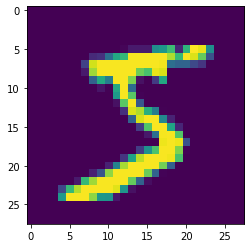

tensor(5)


In [30]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [31]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [32]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x

mnist_net = MNISTNet(100)

In [33]:
torch.cuda.is_available()

True

In [34]:
!nvidia-smi

"nvidia-smi" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [35]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mnist_net = mnist_net.to(device)
#list(mnist_net.parameters())

In [36]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [38]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(30):
    order = np.random.permutation(len(X_train))

    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)

        preds = mnist_net.forward(X_batch)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)

    print(accuracy)

tensor(0.9624, device='cuda:0')
tensor(0.9626, device='cuda:0')
tensor(0.9627, device='cuda:0')
tensor(0.9614, device='cuda:0')
tensor(0.9622, device='cuda:0')
tensor(0.9620, device='cuda:0')
tensor(0.9616, device='cuda:0')
tensor(0.9643, device='cuda:0')
tensor(0.9633, device='cuda:0')
tensor(0.9607, device='cuda:0')
tensor(0.9604, device='cuda:0')
tensor(0.9620, device='cuda:0')
tensor(0.9636, device='cuda:0')
tensor(0.9621, device='cuda:0')
tensor(0.9630, device='cuda:0')
tensor(0.9593, device='cuda:0')
tensor(0.9623, device='cuda:0')
tensor(0.9634, device='cuda:0')
tensor(0.9617, device='cuda:0')
tensor(0.9621, device='cuda:0')
tensor(0.9628, device='cuda:0')
tensor(0.9634, device='cuda:0')
tensor(0.9638, device='cuda:0')
tensor(0.9631, device='cuda:0')
tensor(0.9614, device='cuda:0')
tensor(0.9644, device='cuda:0')
tensor(0.9661, device='cuda:0')
tensor(0.9634, device='cuda:0')
tensor(0.9654, device='cuda:0')
tensor(0.9632, device='cuda:0')


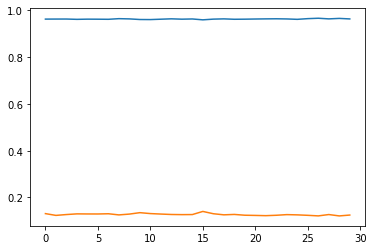

In [39]:
plt.plot(test_accuracy_history)
plt.plot(test_loss_history)